In [16]:
import pandas as pd

In [17]:
df = pd.read_excel("L15_COMBO.xlsx")

final_merged_df = df.groupby('Stock Code', as_index=False)['ZSCORE_FINAL'].mean()

final_merged_df.head(40)

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)



In [18]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2009-03-31")
end_date = pd.to_datetime("2012-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False) 





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['ABAN', 'ADANIENT', 'AXISBANK', 'EDUCOMP', 'GLENMARK', 'GMRAIRPORT', 'GTLINFRA', 'GVT&D', 'HAVELLS', 'HCLTECH', 'HINDALCO', 'IDBI', 'IDEA', 'JMFINANCIL', 'LICHSGFIN', 'MOTHERSON', 'NFL', 'PFC', 'PTC', 'RECLTD', 'RELIGARE', 'RELINFRA', 'SUZLON', 'TATAMOTORS', 'TATAPOWER', 'TATASTEEL', 'UNITECH']


C:\Users\meets\AppData\Local\Temp\ipykernel_22060\3447860504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
C:\Users\meets\AppData\Local\Temp\ipykernel_22060\3447860504.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])


,Date,ABAN,ADANIENT,AXISBANK,EDUCOMP,GLENMARK,GMRAIRPORT,GTLINFRA,GVT&D,HAVELLS,...,PFC,PTC,RECLTD,RELIGARE,RELINFRA,SUZLON,TATAMOTORS,TATAPOWER,TATASTEEL,UNITECH
0,2009-04-01,-0.006778,0.045590,0.007831,0.053779,-0.008286,0.029520,0.044143,0.014325,0.020761,...,-0.016422,0.028592,-0.006935,-0.015642,0.066822,0.099174,-0.001387,0.032531,0.019417,0.070201
1,2009-04-02,0.028055,0.066476,0.050807,0.063651,0.025386,0.024578,0.003252,0.042854,0.050847,...,0.014938,0.012509,0.008380,0.003240,0.045909,0.093448,0.131944,0.067423,0.071429,0.004016
2,2009-04-06,0.028642,0.125335,-0.009670,0.025005,0.117518,0.012994,0.009724,0.009573,-0.012903,...,-0.028571,-0.015100,0.018006,0.000000,0.064754,0.103143,0.030675,0.013577,0.046667,-0.020000
3,2009-04-08,0.040631,-0.016081,0.018955,-0.060884,0.017667,0.079428,0.001605,0.008788,0.071895,...,0.003565,0.025087,0.013605,0.001384,0.009306,0.034728,0.064286,0.023296,0.031847,0.070748
4,2009-04-09,0.004823,0.023305,0.004510,-0.034636,-0.020942,-0.015996,0.003205,-0.000688,0.003049,...,-0.017762,0.009517,-0.041611,-0.002918,0.059689,-0.010327,0.014541,0.007399,0.074074,0.069886


In [19]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()



# Step 1: Initial weights from Z-score
final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"] / final_df["ZSCORE_FINAL"].sum()

# Step 2: Cap and redistribute iteratively
cap = 0.07
weights = final_df['PORTFOLIO_WEIGHTS'].copy()

while True:
    over_cap = weights > cap
    if not over_cap.any():
        break  # Exit loop if no weights are over the cap

    # Cap the overweight stocks
    weights[over_cap] = cap

    # Redistribute the excess weight
    total_weight = weights.sum()
    excess = 1.0 - total_weight

    # Identify stocks eligible to receive excess (not capped)
    under_cap = weights < cap
    allocatable = weights[under_cap]
    scaling_sum = allocatable.sum()

    if scaling_sum == 0:
        break  # Avoid divide by zero

    # Distribute excess proportionally
    weights[under_cap] += (allocatable / scaling_sum) * excess

final_df['PORTFOLIO_WEIGHTS'] = weights

# Final checks (optional)
print("Max weight:", final_df['PORTFOLIO_WEIGHTS'].max())  # Should be <= 0.07
print("Total weight:", final_df['PORTFOLIO_WEIGHTS'].sum())  # Should be ~1.0


final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)


final_df.to_csv("L15_COMBO_OP_NEW.csv",index=False)

Max weight: 0.07
Total weight: 1.0000000000000002


C:\Users\meets\AppData\Local\Temp\ipykernel_22060\1823870918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"] / final_df["ZSCORE_FINAL"].sum()
C:\Users\meets\AppData\Local\Temp\ipykernel_22060\1823870918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = weights


In [20]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              748 non-null    datetime64[ns]
 1   Portfolio Return  748 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


In [21]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
final_portfolio_benchmark.to_csv("L15_COMBO_FINAL_NEW.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2009-04-01   2009-04-01
End Period                 2012-04-02   2012-04-02
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          93.16%       77.24%
CAGR﹪                     16.33%       14.05%

Sharpe                     1.1          0.82
Prob. Sharpe Ratio         97.75%       92.39%
Smart Sharpe               0.98         0.73
Sortino                    1.78         1.22
Smart Sortino              1.58         1.09
Sortino/√2                 1.26         0.87
Smart Sortino/√2           1.11         0.77
Omega                      1.15         1.15

Max Drawdown               -32.26%      -50.23%
Longest DD Days            510          510
Volatility (ann.)          22.29%       28.23%
R^2                        0.85         0.85
Information Ratio          -0.01        -0.01
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2010-11-10,2011-12-20,2012-04-02,510,-50.232864,-49.224040
2,2009-06-05,2009-07-13,2009-07-27,53,-17.538321,-15.576929
3,2009-10-01,2009-11-03,2009-12-07,68,-16.156497,-12.731841
4,2010-04-28,2010-05-25,2010-07-26,90,-13.523549,-12.081128
5,2010-01-19,2010-02-05,2010-04-22,94,-11.112417,-10.216186


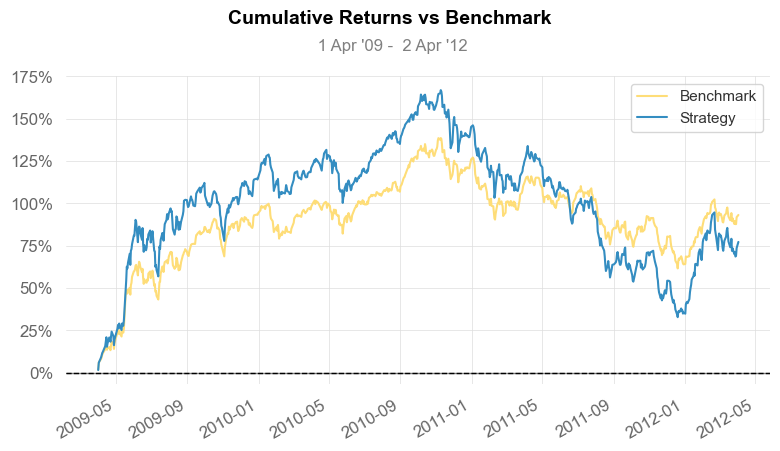

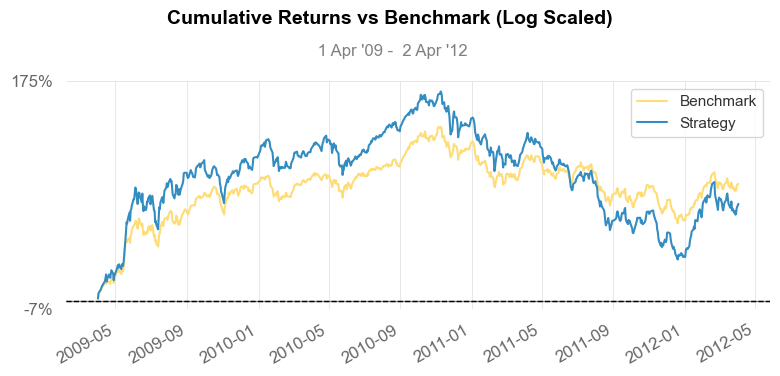

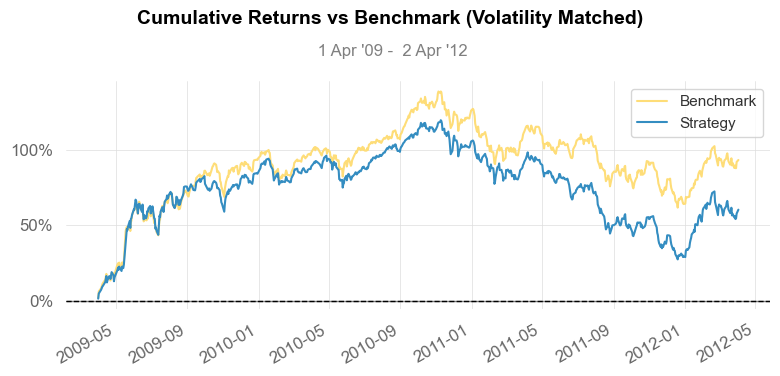

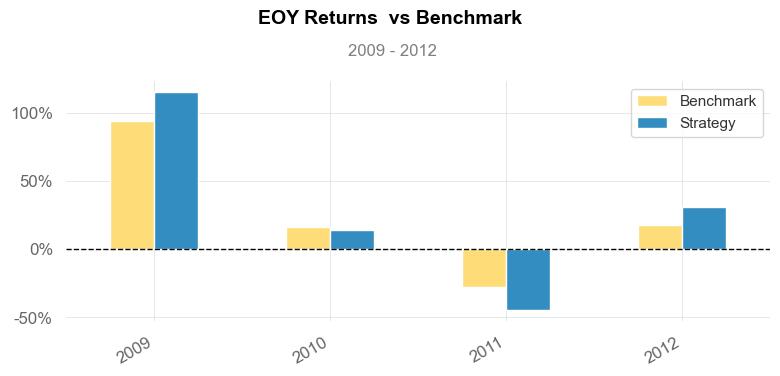

OptionError: No such keys(s): 'mode.use_inf_as_null'

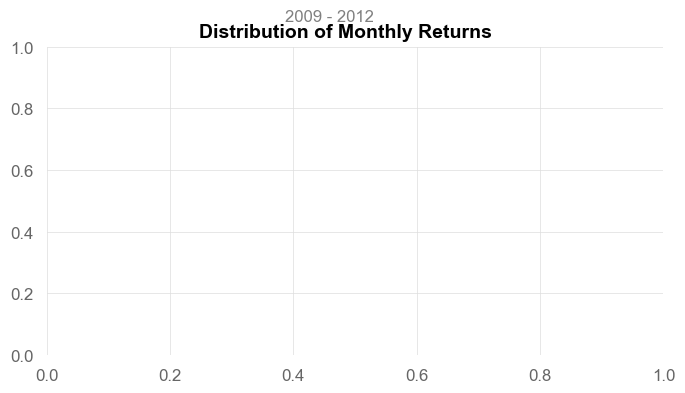

In [22]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")